## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

## Data preprocessing 

In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Visualization

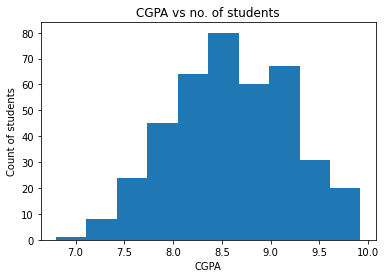

In [8]:
# cgpa vs students histogram
plt.hist(df["CGPA"], bins=10)
plt.title("CGPA vs no. of students")
plt.xlabel("CGPA")
plt.ylabel("Count of students")
plt.show()

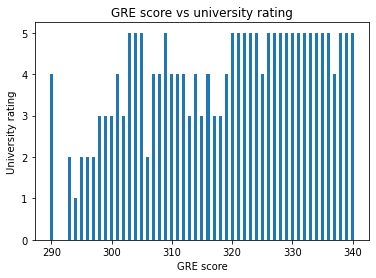

In [9]:
# visualizing gre score vs the university rating
plt.bar(df["GRE Score"], df["University Rating"], width=0.5)
plt.xlabel("GRE score")
plt.ylabel("University rating")
plt.title("GRE score vs university rating")
plt.show()

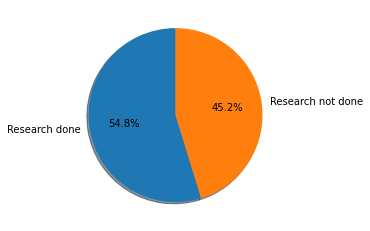

In [10]:
# visualizing the count of students who have done reasearch or not
values = np.array([len(df[df["Research"]==1]), len(df[df["Research"]==0])])
plt.pie(values, labels=["Research done", "Research not done"], startangle=90, autopct='%1.1f%%', shadow=True)
plt.show()

## Model creation 

In [11]:
# creating train test split
X = df.iloc[:, 1:8]
feature_names = list(X.columns)
Y = df.iloc[:, 8:9]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=25)

In [12]:
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)
type(x_train)

Shape of x_train:  (300, 7)
Shape of x_test:  (100, 7)
Shape of y_train:  (300, 1)
Shape of y_test:  (100, 1)


pandas.core.frame.DataFrame

In [13]:
# creating the decision tree model
decision_tree = tree.DecisionTreeRegressor(random_state=25)
decision_tree = decision_tree.fit(x_train, y_train)